# Mecânica Orbital

* PET - Física UFRN
* Petiano: Bruno Ramos Galindo
* Data: 08/07/2024

$\quad$ O presente trabalho tem como objetivo fazer com que o leitor entenda o movimento de planetas e estrelas de sistemas binários em torno de um centro de massa devido à força que atua sobre o sistema e o momento angular. Determinaremos as fórmulas que descrevem tais movimentos e seus significados físicos que nos auxiliam no estudo destes corpos celestes, tal qual também possibilita que a humanidade envie satélites artificiais em órbita da Terra. Para alcançar o objetivo, neste `Notebook` exploraremos a teoria por trás do movimento orbital e implementaremos gráficos e códigos que facilitem o entendimento e a didática do conteúdo abordado.

## Pré-Requisitos

$\quad$ Para melhor entendimento deste `Notebook`, recomenda-se que o leitor tenha uma noção básica de Python. Além disso, é necessário ter um ambiente com bibliotecas e funções necessárias para o funcionamento do código.

### Importando Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import year, hour, au, G
from astropy.constants import M_sun

### Detalhes da Bibliotecas

In [51]:
%load_ext version_information
%version_information Matplotlib, Numpy, Scipy

Software versions
Python 3.11.3 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.12.0
OS Windows 10 10.0.22621 SP0
Matplotlib 3.7.1
Numpy 1.24.3
Scipy 1.10.1
Wed Jul 03 18:12:16 2024 Hora oficial do Brasil

## 1. Uma breve introdução

$\quad$ As leis fundamentais do movimento planetário foram primeiramente formuladas pelo astrônomo Johannes Kepler com base em dados empíricos do século XVII. Kepler usou as medições mais precisas das posições planetárias disponíveis naquele momento. Particularmente para o planeta Marte, ele percebeu que o movimento aparente de Marte no céu poderia ser explicado assumindo que o planeta segue uma órbita elíptica ao redor do Sol. Isso foi uma proposta completamente revolucionária, pois o movimento dos planetas era considerado circular (mais precisamente, uma combinação de movimentos circulares no sistema de Ptolomeu), com a Terra estando no centro do Universo. Embora as diferenças fossem bastante minuciosas, Kepler concluiu pelas suas análises que os planetas se movem em órbitas elípticas, onde o Sol está localizado em um dos pontos focais da elipse (primeira lei). Na linguagem moderna, a área varrida pelo vetor radial do Sol para um planeta é proporcional ao tempo da elipse (segunda lei). Depois, ele encontrou a relação entre os semi-eixos maiores (o seguimento de linha do centro, passando pelo foco até o perímetro de uma elipse) e os períodos orbitais, que hoje é conhecido como a Terceira Lei de Kepler. Isaac Newton encontrou uma explicação teórica para as leis de Kepler para o movimento planetário através da aplicação das leis dele sobre a gravidade e a conservação de momento angular.

## 2. Geometria da elipse

$\quad$ Para entendermos os significados das leis de Kepler, nós devemos entender a natureza de uma elipse. Uma elipse é definido pelo conjunto de pontos que satisfaz a equação

$$r + r' = 2a \ , \tag{2.1}$$

$\quad$ onde $a$ é uma constante conhecida como semi-eixo maior (maior eixo de uma elipse), e $r$ e $r'$ representam as distâncias da elipse para os dois pontos focais, $F$ e $F'$, respectivamente. 

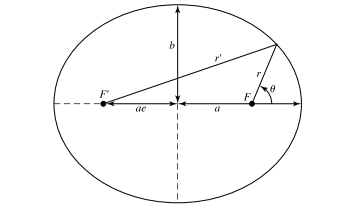

$\quad$ Conforme a primeira lei de Kepler, as órbitas dos planetas ao redor do Sol são uma elipse e o Sol se encontra em um dos focos da elipse, o **foco principal**, $F$ (o outro foco é um espaço vazio). Note que, se $F$ e $F'$ fossem localizados no mesmo ponto, então $r'=r$ e a equação anterior seria resumida a $r = r' = a$, basicamente se tornaria a equação para um círculo. A distância $b$ é conhecida como semi-eixo menor da elipse. A **excentricidade**, $(0 \leq e <1)$, da elipse é definida como a distância entre os pontos focais dividida por $2a$, implicando que a distância de ambos os pontos do centro da elipse pode ser expressa como $ae$. Para um círculo, $e=0$. O ponto da elipse que está mais próximo do foco principal (localizado no semi-eixo maior) é chamado de periélio; o ponto que está mais distante do foco principal (localizado no semi-eixo maior) é conhecido como afélio.

$\quad$ Uma conveniente relação entre $a,b$ e $e$ pode ser determinada geometricamente. Considere um de dois pontos ambos no fim do semi-eixo menor da elipse, onde $r = r'$. Nesse caso, $r = a e$, usando o teorema de Pitágoras, $r^2 = b^2 + a^2e^2$. Substituindo obtemos imediatamente a equação

$$\boxed{b^2 = a^2(1-e^2)}. \tag{2.2}$$

$\quad$ A segunda lei de Kepler afirma que a velocidade de um planeta depende da localização dele na órbita. Para descrever em detalhes a órbita de um planeta, é necessário especificar onde esse planeta está (o vetor posição), bem como o quão rápido e qual a direção o planeta está se movendo. É frequentemente conveniente expressar uma órbita planetária em coordenadas polares, indicando a distância $r$ do foco principal em termos de um ângulo $\theta$ medido no sentido anti-horário a partir do eixo principal da elipse começando do periélio. Usando o teorema de Pitágoras, nós temos

$$r'^2 = r^2sin^2(\theta) + (2ae + rcos(\theta)^2 \ ,$$

que se reduz para

$$r'^2 = r^2 + 4ae(ae + rcos(\theta)) \ .$$

$\quad$ Usando a definição de uma elipse, $r + r' = 2a$, nós encontramos que 

$$\boxed{r = \frac{a(1-e^2)}{1+ecos(\theta)}\hspace{0.5cm} (0 \leq e < 1)} \ .\tag{2.3}$$

$\quad$ Quando estamos querendo encontrar a distância $r$ no ponto localizado no periélio, a equação se reduz a

$$r = a(1-e) \ , \tag{2.4}$$

visto que no periélio $\theta = 0$ e $\cos(\theta) = 1$. Quando estamos querendo encontrar a distância $r$ no ponto localizado no afélio, a equação se reduz a

$$r = a(1+e) \ ,  \tag{2.5}$$

visto que no afélio $\theta = \pi$ e $\cos(\theta) = -1$.

## 3. Derivando as leis de Kepler

$\quad$ Através da pesquisa que Kepler fez, foi finalmente determinado que a geometria da movimentação dos planetas é, de modo geral, mais próxima de uma elipse do que a de um círculo, mas ele não conseguiu explicar a natureza da força que mantinha os planetas em movimento. Em contrapartida, Isaac Newton obteve êxito em quantificar essa força, ele também pôde generalizar o trabalho de Kepler, derivando leis empíricas do movimento planetário por meio da lei de força gravitacional. A derivação da Lei de Kepler representa um passo crucial no desenvolvimento da astrofísica moderna.

### 3.1 O centro de massa de refêrencia

$\quad$ No entanto, antes de desenvolver as leis de Kepler, será útil examinar mais de perto a dinâmica do movimento orbital. Um interessante problema de dois corpos são as órbitas binárias. De maneira geral, problemas de vários corpos são mais facilmente resolvidos tendo um centro de massa como referência.

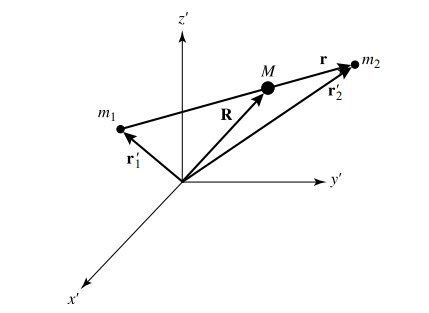

$\quad$ A figura acima mostra dois objetos de massa $m_1$ e $m_2$, respectivamente, com um vetor deslocamento  $\mathbf{r_1'}$ e $\mathbf{r_2'}$ dado por:

$$r = \mathbf{r}_2' - \mathbf{r}_1' . \tag{3.1}$$

$\quad$ Defina um vetor posição $\mathbf{R}$ como uma média ponderada dos vetores de posição das massas individuais

$$\mathbf{R} = \frac{m_1\mathbf{r}_1' + m_2\mathbf{r}_2'}{m_1+m_2}. \tag{3.2}$$

$\quad$Podemos generalizar a equação acima para $n$ objetos como sendo

$$ \mathbf{R} = \frac{\sum_{i=1}^{n} m_i\mathbf{r}_i'}{\sum_{i=1}^{n} m_i}.$$

$\quad$ Reescrevendo a equação temos que:

$$ \sum_{i=1}^{n}m_i \mathbf{R} = \sum_{i=1}^{n} m_i\mathbf{r}_i'.$$

$\quad$ Então, se nós definimos $M$ para ser a massa total de um sistema, $M = \sum_{i=1}^{n}m_i$, a equação agora se torna

$$ M\mathbf{R} = \sum_{i=1}^{n} m_i\mathbf{r}_i'.$$

$\quad$ Assumindo que a massa individual não muda, podemos aplicar a derivada em relação ao tempo em ambos os lados considerando a massa constate, logo

$$M\frac{d\mathbf{R}}{dt} = \sum_{i=1}^{n}m_i\frac{d\mathbf{r}_i'}{dt} $$

$\quad$ou

$$M\mathbf{V} = \sum_{i=1}^{n}m_i\mathbf{v}_i'.$$

$\quad$ O lado direito da equação é a soma do momento linear de todas as partículas do sistema, então o momento linear total de um sistema pode ser tratado como se toda a massa estivesse localizada em $\mathbf{R} $, movendo-se com uma velocidade $\mathbf{V}$. Esse $\mathbf{R}$ é a posição do centro de massa do sistema e $\mathbf{V}$ é a velocidade do centro de massa. Logo, $\mathbf{P} = \mathbf{MV}$ é o momento linear do centro de massa e $\mathbf{p}_i' = m_i\mathbf{v}_i'$ é o momento linear de uma partícula individual $i$. Podemos agora diferenciar novamente ambos os lados da equação em relação ao tempo.

$$\frac{d\mathbf{P}}{dt} = \sum_{i=1}^{n}\frac{d\mathbf{p}_i'}{dt}.$$

$\quad$ Se assumimos que todas as forças agindo sobre as partículas individuais no sistema são devido ao contato de outras partículas com o sistema, a terceira lei de Newton requer que a força total deva ser zero. Esse contraste existe devido às magnitudes que são iguais e das posições opostas da paridade ação e reação. No entanto, é claro que o momento linear de cada partícula pode variar. Usado o centro de massa, encontramos que a força total no sistema é 

$$\mathbf{F} = \frac{d\mathbf{P}}{dt} = M\frac{d^2\mathbf{R}}{dt^2} = 0. $$

$\quad$ Todavia, o centro de massa não acelerará se não há uma força existindo. Logo, o sistema de referência associado com o centro de massa deve ser um sistema de referencial inercial e que o problema de **N-corpos (vários corpos)** pode ser simplificado, escolhendo um sistema de coordenadas para o qual o centro de massa está em repouso em $R = 0$.

$\quad$ Se escolhermos um referencial  de centro de massa para um sistema binário, e considerando **$R = 0$**, a Eq. **(3.2)** se torna

$$\frac{m_1\mathbf{r}'_1 + m_2\mathbf{r}'_2}{m_1+m_2} = 0. \tag{3.3}$$

$\quad$ Ambos $\mathbf{r}_1$ e $\mathbf{r}_2$ podem ser reescritos em termos do vetor, $\mathbf{r}$. Substituindo $\mathbf{r}'_2 = \mathbf{r}'_1 + \mathbf{r}$, temos que

$$\mathbf{r}'_1 = -\frac{m_2}{m_1+m_2}\mathbf{r} \ , \tag{3.4}$$

$$\mathbf{r}'_2 = \frac{m_2}{m_1+m_2}\mathbf{r}. \tag{3.5}$$

$\quad$ Podemos então definir a **massa reduzida** como sendo

$$\boxed{\mu = \frac{m_1m_2}{m_1 + m_2}}. \tag{3.6}$$

$\quad$ Então $\mathbf{r}'_1$ e $\mathbf{r}'_2$ se tornam

$$ \boxed{\mathbf{r}'_2 = -\frac{\mu}{m_1}\mathbf{r}} \ , \tag{3.7}$$

$$ \boxed{\mathbf{r}'_2 = \frac{\mu}{m_2}\mathbf{r}}. \tag{3.8}$$

$\quad$ A conveniência do centro de massa do sistema de referência se torna evidente quando a energia total e o momento angular do sistema são considerados. Incluindo a necessidade de energia cinética e termos da energia potencial gravitacional, a energia total pode ser expressa como

$$ E = \frac{1}{2}m_1|\mathbf{v}_1|^2 + \frac{1}{2}m_2|\mathbf{v}_2|^2 - G\frac{m_1m_2}{|\mathbf{r}'_2 - \mathbf{r}'_1|} \ .$$

$\quad$ Substituindo as relações para $\mathbf{r}_1$ e $\mathbf{r}_2$, a equação acima se torna

$$E = \frac{1}{2}\mu v^2 - G\frac{M\mu}{r} \ .\tag{3.9}$$

$\quad$ Onde $v = |\mathbf{v}|$ e $v = dr/dt$. Nós também usamos a notação $r = |\mathbf{r}'_2 - \mathbf{r}'_1|$. A energia total do sistema é igual para a energia cinética da massa reduzida, mais a energia potencial da massa reduzida movendo-se sobre uma massa $M$, assumindo estar localizado e fixado na origem. A distância entre $\mu$ e $M$ é igual à separação entre os objetos de massas $m_1$ e $m_2$.

$\quad$ Similarmente, o momento orbital total é

$$\mathbf{L} = m_1\mathbf{r}'_1 \times \mathbf{v}_1 + m_2\mathbf{r}'_2 \times \mathbf{v}_2 \ .$$

$\quad$ Se torna então

$$\mathbf{L} = \mu \mathbf{r} \times \mathbf{v} = \mathbf{r} \times \mathbf{p}. \tag{3.10}$$

$\quad$ Onde $\mathbf{p} = \mu \mathbf{v}$. O momento angular orbital total é igual ao momento angular da massa reduzida.

### 3.2 A derivação da primeira Lei de Kepler

$\quad$ Para obtermos as leis de Kepler, começaremos considerando o efeito da gravidade no momento angular orbital de um planeta. Usando as coordenadas do centro de massa e aplicando a derivada em relação ao tempo na Eq. **(3.10)** vemos a evolução do momento angular orbital da massa reduzida dada por

$$\frac{d\mathbf{L}}{dt} = \frac{d\mathbf{r}}{dt}  \times \mathbf{p} + \mathbf{r} \times \frac{d\mathbf{p}}{dt} = \mathbf{v} \times \mathbf{p} + \mathbf{r} \times \mathbf{F}. \tag{3.11}$$

$\quad$ A segunda expressão é oriunda da definição de velocidade e da segunda lei de Newton. Note que, devido a $\mathbf{v}$ e $\mathbf{p}$ estão na mesma direção, o produto vetorial deles é igual a zero. De maneira similar, $\mathbf{F}$ é uma força central direcionada para dentro ao longo de $\mathbf{r}$, o produto vetorial $\mathbf{F}$ e $\mathbf{r}$ também é zero. O resultado é uma importante declaração sobre o momento angular.

$$\frac{d\mathbf{L}}{dt} = 0. \tag{3.12}$$

$\quad$ O momento angular de um sistema é uma constante para uma força centrípeta. A Eq. **(3.10)** mostra que a posição do vetor $\mathbf{r}$ é sempre perpendicular ao constante vetor momento angular $\mathbf{L}$, em outras palavras, isso significa que a órbita da massa reduzida está em um plano perpendicular ao momento angular $\mathbf{L}$.

$\quad$ Usando o vetor unitário $\hat{r}$ (então $\mathbf{r} = r \hat{r}$), podemos agora escrever o vetor momento angular na sua forma alternativa como sendo

$$\mathbf{L} = \mu \mathbf{r} \times \mathbf{v}$$

$$= \mu r \hat{r} \times \frac{d}{dt}(r\hat{r})$$

$$= \mu r\hat{r} \times \left(\frac{d\mathbf{r}}{dt}\hat{r} + r\frac{d}{dt}\hat{r}\right).$$

$\quad$ O produto vetorial entre $\mu r^2\hat{r}$ e $\frac{dr}{dt}\hat{r}$ é igual a zero, visto que $\hat{r} \times \hat{r} = 0$. Logo, o momento angular é dado por:

$$ L = \mu r^2\hat{r} \times \frac{dr}{dt}\hat{r}. $$

$\quad$ Na forma vetorial, a aceleração da massa reduzida devido à ação da força gravitacional exercida por $M$ é

$$\mathbf{a} = -\frac{GM}{r^2}\hat{r}.$$

$\quad$ Fazendo o produto vetorial entre a aceleração da massa reduzida com o próprio  momento angular e aplicando a identidade vetorial $\mathbf{A} \times ( \mathbf{B} \times \mathbf{C}) = (\mathbf{A} \cdot \mathbf{C})\mathbf{B} - (\mathbf{A}  \cdot \mathbf{B})\mathbf{C}$, temos que

$$\mathbf{a} \times \mathbf{L} = -GM\mu \left[\left(\hat{r} \cdot \frac{d}{dt}\hat{r}\right)\hat{r} - (\hat{r} \cdot \hat{r})\frac{d}{dt}\hat{r}\right].$$

$\quad$ Sabendo que $\hat{r}$ é um vetor unitário, logo $\hat{r} \cdot \hat{r} = 1$, então

$$\frac{d}{dt}(\hat{r}\cdot\hat{r}) = 2\hat{r}\cdot\frac{d}{dt}\hat{r} = 0.$$

$\quad$Como resultado,

$$\mathbf{a} \times \mathbf{L} = GM\mu \frac{d}{dt}\hat{r}$$

$\quad$ou, usando a Eq. **(3.12)**, podemos

$$\frac{d}{dt}(\mathbf{v} \times \mathbf{L}) = \frac{d}{dt}(GM\mu \hat{r}).$$

$\quad$ Integrando em relação ao tempo, temos que

$$ \mathbf{v} \times \mathbf{L} = GM\mu \hat{r} + \mathbf{D}. \tag{3.13}$$

$\quad$ Onde $\mathbf{D}$ é um vetor constante. Porque $\mathbf{v} \times \mathbf{L}$ e $\hat{r}$ estão ambos no plano orbital, então $\mathbf{D}$ deve estar também. Além disso, a magnitude do lado esquerdo da equação será maior no periélio, quando a velocidade da massa reduzida é máxima. E essa magnitude é maior quando $\hat{r}$ e $\mathbf{D}$ apontam para a mesma direção. Portanto, $\mathbf{D}$ é direcionado para o periélio. Como mostrado abaixo, a magnitude de $\mathbf{D}$ determina a excentricidade da órbita.

$\quad$ Usando a Eq. **(3.13)** e aplicando o produto escalar com o vetor posição $\vec{r} = r\hat{r}$, teremos

$$  \mathbf{r}\cdot (\mathbf{v} \times \mathbf{L}) = GM\mu r \hat{r} \cdot \hat{r} + \mathbf{r} \cdot \mathbf{D} $$

$\quad$ Aplicando a identidade vetorial $\mathbf{A} \cdot (\mathbf{B} \times \mathbf{C}) = (\mathbf{A} \times \mathbf{B})\cdot \mathbf{C}$, temos

$$ (\mathbf{r} \times \mathbf{v})\cdot \mathbf{L} = GM \mu r + rDcos(\theta).$$

$\quad$ Relembrando a definição de momento angular usando a Eq. **(3.10)**, temos

$$\frac{L^2}{\mu} = GM \mu r \left(1 + \frac{Dcos(\theta)}{GM \mu}\right).$$

$\quad$ Onde $\theta$ é o ângulo da massa reduzida medida da direção do periélio. Definindo $e = D/GM \mu$ e deixando $r$ isolado, temos que:

**Primeira Lei de Kepler**

$$\boxed{ r = \frac{L^2/\mu^2}{GM(1+ecos(\theta))}.} \tag{3.14}$$

$\quad$ Deste modo, a primeira lei de Kepler para as órbitas planetárias pode ser estabelecida como: ambos os objetos em uma órbita binária movem-se ao redor do centro de massa da elipse, com o centro de massa estando em um dos focos da elipse. Para nosso sistema solar, em vez do centro de massa estar no centro exato do Sol, está, na verdade, em um dos focus da elipse.

$\quad$ Para o caso de órbitas planetárias, comparando a equação **(2.3)** e **(3.14)** mostra-se que momento angular de um sistema é dado por

$$ L = \mu \sqrt{GMa(1-e^2)} \tag{3.15}$$

### 3.3 Derivando a segunda lei de Kepler

$\quad$ Para encontrar a segunda lei de Kepler, que relaciona a área de uma seção da elipse com um intervalo de tempo, começamos considerando um elemento de área infinitesimal em coordenadas polares, como mostrado na figura abaixo.

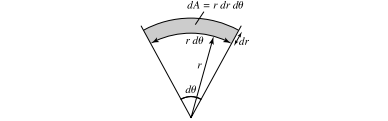

$\quad$ Em que essa área pode ser determinada da seguinte forma,

$$dA = dr(rd\theta) = rdrd\theta .$$

$\quad$ Se integrarmos do foco principal da elipse para uma distância específica, $r$, a área varrida por uma mudança infinitesimal de $\theta$ se torna

$$dA = \frac{1}{2}r^2d\theta . $$

$\quad$ Portanto, a taxa de variação temporal na área varrida por uma linha que une um ponto na elipse ao foco torna-se

$$\frac{dA}{dt} = \frac{1}{2}r^2\frac{d\theta}{dt} . \tag{3.16}$$

$\quad$ Agora a velocidade orbital, $\mathbf{v}$, pode ser expressa em dois componentes, um na direção de $r$ e o outro perpendicular a $r$. Deixando $\hat{r}$ e $\hat{\theta}$ para serem vetores unitários ao longo de $r$ e sua normal, respectivamente, $\mathbf{v}$ pode ser escrito como sendo:

$$\mathbf{v} = \mathbf{v}_r + \mathbf{v}_{\theta} = \frac{dr}{dt}\hat{r} + r\frac{d\theta}{dt}\hat{\theta}.$$

$\quad$ Substituindo $\mathbf{v}_{\theta}$ na Eq. **(3.15)** temos

$$\frac{dA}{dt} = \frac{1}{2}\mathbf{r} \cdot \mathbf{v}_{\theta}.$$

$\quad$ Sabendo que $\mathbf{r}$ e $\mathbf{v}_{\theta}$ são perpendiculares,

$$\mathbf{r} \cdot \mathbf{v}_{\theta} = |\mathbf{r} \times \mathbf{v}| = \left|\frac{\mathbf{L}}{\mu}\right| = \frac{L}{\mu}.$$

$\quad$ Finalmente, a derivada da área em relação ao tempo se torna

**Segunda lei de Kepler**

$$\boxed{\frac{dA}{dt} = \frac{1}{2}\frac{L}{\mu}}. \tag{3.17}$$

$\quad$ Deste modo, a segunda lei de Kepler evidência que a taxa de mudança da área varrida em função do tempo por linha que conecta um planeta ao foco da elipse é uma constante.

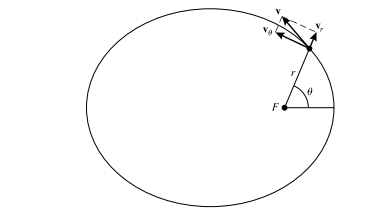

$\quad$ Expressões para a velocidade da massa reduzida no periélio e no afélio, ou seja, $\theta = 0$ e $\theta = \pi$, respectivamente, pode ser facilmente determinadas utilizando a Eq. **(3.14)**. Visto que $\mathbf{v}$ e $\mathbf{r}$ são perpendiculares no periélio e no afélio, temos que o momento angular é dado por:

$$\mathbf{L} = \mu vr.$$

$\quad$ **Obs.**: note que o momento angular é dado por $L = r \times p = rpsin(\phi) = r\mu vsin(\phi)$, sendo o $\phi$ o angulo entre os dois vetores é $\pi/2$, que por sua vez, torna o $sin(\pi/2)$ = 1, e, portanto, $L = \mu vr$.

$\quad$ Para o periélio temos

$$r_p = \frac{(\mu r_p v_p)^2/\mu^2}{GM(1+e)},$$

$\quad$enquanto no afélio

$$r_a = \frac{(\mu r_a v_a)^2/\mu^2}{GM(1 - e)}.$$

$\quad$Sabendo que $r_p = a(1-e)$ e $r_a = a(1+e)$, podemos encontrar expressões para a velocidade no afélio e periélio:

$$V_p^2 = \frac{GM(1+e)}{r_p} = \frac{GM}{a}\frac{(1+e)}{(1-e)} ,\tag{3.18}$$

$\quad$ no periélio, e

$$V_a^2 = \frac{GM(1-e)}{r_a} = \frac{GM}{a}\frac{(1-e)}{(1+e)}, \tag{3.19}$$

$\quad$afélio.

$\quad$ A energia total pode ser encontrada como:

$$E = \frac{1}{2}\mu v_p^2 - G\frac{Mm}{r_p}.$$

$\quad$Fazendo algumas substituições apropriadas a equação torna-se

$$E = -G\frac{M\mu}{2a} = -G\frac{m_1m_2}{2a} .\tag{3.20}$$

$\quad$Uma expressão muito útil para a velocidade de massa reduzida pode ser encontrada diretamente usando a conservação de energia e a equação de energia orbital total. Logo, temos que: 

$$-G\frac{M\mu}{2a} = \frac{1}{2}\mu v^2 - G\frac{M\mu}{r} , $$

logo

$$v^2 = GM\left(\frac{2}{r}-\frac{1}{a}\right).$$

$\quad$ Sabendo que $M = m_1+ m_2$, a equação se torna

$$v^2 = G(m_1+m_2)\left(\frac{2}{r}-\frac{1}{a}\right) . \tag{3.21}$$

## 3.4 Derivando a Terceira Lei de Kepler

$\quad$ Podemos integrar a Eq. **(3.17)** sobre um período orbital $P$ e obter que

$$A = \frac{1}{2}\frac{L}{\mu}P$$

$\quad$ Substituindo $A$ por $\pi ab$ (área de uma elipse) e elevando a equação ao quadrado, passamos a obter 

$$ P = \frac{4\pi^2a^2b^2\mu^2}{L^2}$$

$\quad$ Fazendo algumas operações, temos a fórmula geral para o período $P$ de um movimento planetário em uma órbita elíptica ao redor de uma estrela é dado por:

$$\boxed{P^2 = \frac{4\pi^2}{G(M + m)}a^3}. \tag{3.22}$$

$\quad$ Dado que:
* $a$ é o semi-eixo maior da órbita;
* $G$ é a constante gravitacional;
* $M$ a massa da estrela;
* $m$ massa do planeta.

## 4. Implementação do código

$\quad$ O programa a seguir computa o período orbital dado pela Equação **(3.22)** para os oito planetas do sistema solar. Na realidade, isso é uma aproximação, pois negligenciamos a mútua interferência entre os planetas. Em outras palavras, a terceira lei de Kepler assume um sistema de dois corpos. Isto é, é mais preciso do que usar uma massa de teste aproximadamente nula ($m=0$). O código abaixo compara os períodos resultantes dos dois corpos (Sol e planeta) com a fórmula com uma massa teste aproximadamente zero.

In [2]:
def plot_ticks(): #função para colocar ticks no gráficos
    plt.figure(figsize = (8,5))
    plt.minorticks_on()
    plt.tick_params(axis='x', which='both', top = True, right = True, direction = 'in', length=5, width=1)
    plt.tick_params(axis='y', which='both', top = True, right = True, direction = 'in', length=5, width=1)

In [3]:
M_S = M_sun.value #massa do sol

#massa de cada planeta
m = 1e24 * np.array([0.33011, 4.8675, 5.9723, 0.64171,1898.19, 568.34, 86.813, 102.413]) 

# maior semi-eixo de cada planeta
a = 1e9 * np.array([57.9, 108.21, 149.60, 227.92, 778.57, 1433.53, 2872.46, 4495.06])

T_massa_0 = 2*np.pi*(G*M_S)**(-1/2)*a**(3/2)
T_dois_corpos = 2*np.pi*(G*(M_S+m))**(-1/2)*a**(3/2)

In [4]:
print("Planetas | T [yr]|dev [hr]| dev rel|")
cont = 0
planetas = ['Mercurio', 'Vênus', 'Terra', 'Marte', 'Jupíter', 'Saturno', 'Urano', 'Netuno']
for x1, x2 in zip(T_massa_0,T_dois_corpos):
    diff = x1 - x2
    if diff > hour:
        linha = "{:<9s}| {:6.2f}| {:>7.1f}| {:.1e}|"
    else:
        linha = "{:<9s}| {:6.2f}| {:7.4f}| {:.1e}|"
   
    print(linha.format(planetas[cont],x2/year, diff/hour, diff/x1))
    cont += 1

Planetas | T [yr]|dev [hr]| dev rel|
Mercurio |   0.24|  0.0002| 8.3e-08|
Vênus    |   0.62|  0.0066| 1.2e-06|
Terra    |   1.00|  0.0132| 1.5e-06|
Marte    |   1.88|  0.0027| 1.6e-07|
Jupíter  |  11.88|    49.6| 4.8e-04|
Saturno  |  29.68|    37.2| 1.4e-04|
Urano    |  84.20|    16.1| 2.2e-05|
Netuno   | 164.82|    37.2| 2.6e-05|


$\quad$ Os períodos orbitais definidos pela equação **(3.21)** e a massa teste aproximada, onde a massa do planeta é negligenciada, são computadas em `T_dois_corpos` e `T_massa_0`, respectivamente, usando os operadores array. Os resultados são printados no loop `for`, onde a primeira coluna da lista de períodos é dada pela equação **(3.21)**, a segunda coluna é o desvio da aproximação da massa teste em horas (hr), e a terceira coluna é o desvio relativo.

$\quad$ Enquanto a revolução de Mercúrio ao redor do Sol é efetuada quatro vezes por ano, a revolução de Netuno é acima de um século para completar a órbita em torno do Sol. Para printar o período em anos, nós precisamos dividir o valor computado no **SI** (Sistema Internacional de Unidades) (s) para conversão em anos. O desvio da massa teste aproximada é maior para planetas mais distantes como, por exemplo, Júpiter, Saturno, Urano e Netuno, como eles são muito massivos do que planetas de órbitas mais próximas como Mercúrio, Vênus, Terra e Marte. No entanto, o erro relativo do período orbital é pequeno. Para alinhar os valores na terceira coluna e ajustar os pontos decimais, foi usado um `If-else`, estruturas de controle de fluxo em Python usadas para definir o formato de uma linha, dependendo do valor do desvio absoluto, é maior ou menor do que uma hora (o método hour é uma hora em segundos). Para a coluna que possui um comprimento de 7, ou seja, para os planetas mais massivos, o valor do desvio foi arredondado para 1 e para os planetas com menos massa, portanto, com um desvio menor do que 1 hora, temos um arrendondamento de 4 casas decimais.

$\quad$ Leis de potência, tais quais $P \propto a^{2/3}$, aparece com uma linha reta com inclinação igual ao expoente em um diagrama logaritimico duplo:

$$log P = \frac{2}{3}log a + const . \tag{4.1}$$

$\quad$ Agora, plotamos o resultado obtido em uma escala logarítmica aplicando a função `loglog()` oriunda da biblioteca Matplotlib:

Text(0, 0.5, 'Periodo orbital em [anos]')

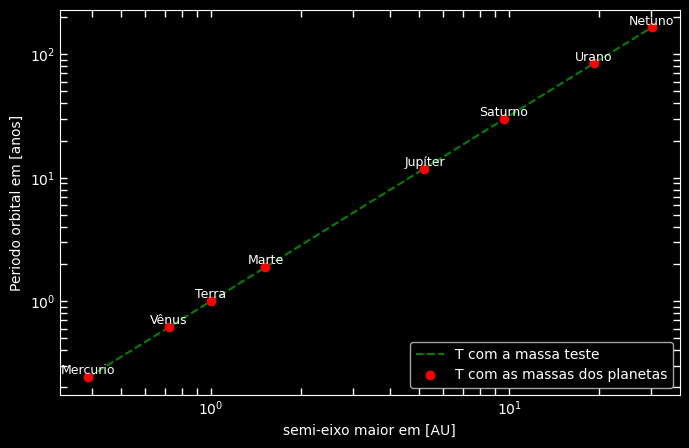

In [5]:
plt.style.use('dark_background') # o estilo é opcional
plot_ticks()
#plt.grid(True)
plt.loglog(a/au, T_massa_0/year, 'green', linestyle = '--', label = 'T com a massa teste')
plt.loglog(a/au, T_dois_corpos/year,'ro', label = 'T com as massas dos planetas')
plt.legend(loc = 'lower right')

for i, planeta in enumerate(planetas):
    plt.text(a[i]/au, T_dois_corpos[i]/year, planeta, fontsize=9, ha='center', va='bottom', color='white')
    
plt.xlabel('semi-eixo maior em [AU]')
plt.ylabel('Periodo orbital em [anos]')

$\quad$ O gráfico acima é o resultado do código. Plotar o período em hora em relação ao o semi-eixo maior em AU (Unidade Astronômica) é simplesmente dividir os períodos obtidos, período com massa teste e período com as massas dos planetas, por hour. 

$\quad$ Vamos agora adicionar para este gráfico os planetas anões Plutão, Ceres e Eris.

Text(0, 0.5, 'Periodo orbital em [anos]')

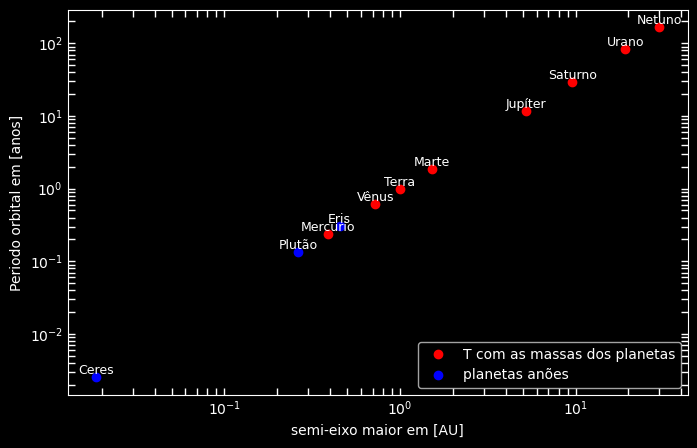

In [6]:
Planetas_anao = ['Ceres', 'Plutão', 'Eris']
a_anao = 1e9 * np.array([2.7675, 39.48, 67.781])#Aqui temos a distancia de Ceres, Plutão e Eris, respectivamente.
T_anao = 2*np.pi*(G*M_S)**(-1/2)*a_anao**(3/2) #Para T_anao não temos massa, pois despresamos a massa dos planetas anões

plt.style.use('dark_background') # o estilo é opcional
plot_ticks()
#plt.grid(True)
#plt.loglog(a/au, T_massa_0/year, 'green', linestyle = '--', label = 'T com a massa teste')
plt.loglog(a/au, T_dois_corpos/year,'ro', label = 'T com as massas dos planetas')
plt.loglog(a_anao/au, T_anao/year, 'bo', label = 'planetas anões')
plt.legend(loc = 'lower right')

corpos_celestes = planetas + Planetas_anao

for i, corpo_c in enumerate(corpos_celestes):
    if i < len(planetas):
        plt.text(a[i]/au, T_dois_corpos[i]/year, corpo_c, fontsize=9, ha='center', va='bottom', color='white')
    else:
        plt.text(a_anao[i-len(planetas)]/au, T_anao[i-len(planetas)]/year, corpo_c, fontsize=9, ha='center', va='bottom', color='white')

    
plt.xlabel('semi-eixo maior em [AU]')
plt.ylabel('Periodo orbital em [anos]')

$\quad$ Note que, nesse gráfico, o período orbital de Ceres, Plutão e Eris, são menores, por terem uma menor distância em relação aos planetas **(neste exemplo)**.

$\quad$ No código abaixo analisaremos a órbita das estrelas binárias Siriús A e B. Para o código abaixo usaremos as Eq. **(3.4), (3.5) e (3.21)**. Além disso, as acelerações são dadas por

$$\ddot{r_1} = \frac{\vec{F_{12}}}{M_1} \hspace{0.5cm} \text{e} \hspace{0.5cm} \ddot{r_2} = \frac{\vec{F_{21}}}{M_2}. \tag{4.2}$$

$\quad$ E sabendo que a força gravitacional é dada por

$$ \mathbf{F_{12} = -F_{21}} = \frac{GM_1M_2}{d^3}\mathbf{d} . \tag{4.3}$$

$\quad$ Vamos agora determinar as condições iniciais do problema.

$\quad$ Nos pontos de mínimo e máxima distância, o vetor velocidade $\dot{\mathbf{d}}$ é perpendicular a $\mathbf{d}$. No periastro, se trata da posição onde os corpos celestes (nesse caso as estrelas) estão mais próximas uma da outra, logo temos que

$$r_1(0) = \left(\frac{M_2}{M_1+M_2}d_p,0,0\right), \tag{4.4}$$

$$r_2(0) = \left(-\frac{M_2}{M_1+M_2}d_p,0,0\right). \tag{4.5}$$

$\quad$ Assumindo que o eixo maior da elipse são alinhados com o eixo $x$. Para elipse de **excentricidade e**, o periastro é dado por $d_p = a(1-e)$ e a velocidade relativa correspondente, $v_p$, é obtida substituindo $d_p$ na Eq. **(3.21)**. Orientando o eixo $z$ perpendicular ao plano orbital, a velocidade no periastro pode ser expressa por

$$ v_1(0) = \dot{r}_1(0) = \left(0, -\frac{M_2}{M_1+M_2}v_p,0\right), \tag{4.6}$$

$$ v_2(0) = \dot{r}_2(0) = \left(0, \frac{M_1}{M_1+M_2}v_p,0\right). \tag{4.7}$$

$\quad$ Deste modo, completamos as condições iniciais do problema para duas estrelas.

In [7]:
M_SA = 2.06*M_sun.value #Massa de Sirius A
M_SB = 1.02*M_sun.value #Massa de Sirius B

a = 2.64*7.4957*au
e = 0.5914

$\quad$ Siriús B é uma anã branca com uma massa solar e Siriús A é uma estrela mais maciça. O semi-eixo maior $a$, aproximadamente $20 \ AU$, é calculado a partir da distância do sistema estelar em relação à Terra e do tamanho angular. A **excentricidade** orbital é de aproximadamente $0.6$ indicando se tratar de uma órbita elíptica. O período orbital segue a terceira lei de Kepler.

In [8]:
P = 2*np.pi * (G*(M_SA+M_SB))**(-1/2) * a**(3/2) #teceira lei de kepler
print('Periodo orbital = {:.1f} anos'.format(P/year))

Periodo orbital = 50.2 anos


$\quad$ Até o momento, resolvemos as equações diferenciais para uma única função. No caso do problema de **dois-corpos**, nós estamos lidando com um sistema de equações diferenciais **(4.2)** para as funções vetoriais $\mathbf{r}_1(t)$ e $\mathbf{r}_2(t)$. Agora, reformulando as equações de movimento como um sistema de equações diferenciais de primeira ordem, temos que

$$\mathbf{\dot{v}}_1 = \frac{GM_2}{|\mathbf{r}_2 - \mathbf{r}_1|^3}(\mathbf{r}_2 - \mathbf{r}_1) \hspace{0.5cm} \text{e} \hspace{0.5cm} \mathbf{\dot{v}}_2 = \frac{GM_2}{|\mathbf{r}_2 - \mathbf{r}_1|^3}(\mathbf{r}_2 - \mathbf{r}_1), $$

$$\mathbf{\dot{r}}_1 = \mathbf{v}_1 \hspace{0.5cm} \text{e} \hspace{0.5cm} \mathbf{\dot{r}}_2 = \mathbf{v}_2.$$

$\quad$ Para o código abaixo, definimos o intervalo de integração em unidades do período orbital e o número de passos de tempo. Em seguida, inicializamos arrays para as coordenadas e componentes de velocidade (a orientação das coordenadas é escolhida de tal forma que as órbitas estão no plano $xy$ e as coordenadas em $z$ possam ser ignoradas).

In [9]:
voltas = 3
passo = voltas*500
dt = voltas*P/passo

tempo = np.arange(0, (passo+1)*dt,dt)

x_1 = np.zeros(passo+1)
y_1 = np.zeros(passo+1)
x_2 = np.zeros(passo+1)
y_2 = np.zeros(passo+1)

vx_1 = np.zeros(passo+1)
vy_1 = np.zeros(passo+1)
vx_2 = np.zeros(passo+1)
vy_2 = np.zeros(passo+1)

$\quad$ A seguir, aplicamos as condições **(4.4)**, **(4.5)**, **(4.6)** e **(4.7)** para os primeiros elementos do arranjo, isto é, colocamos as condições iniciais.

In [10]:
d = a*(1 + e)
v = np.sqrt(G*(M_SA + M_SB) * (2/d - 1/a))

x_1[0], y_1[0] = d*M_SB/(M_SA + M_SB), 0
x_2[0], y_2[0] = -d*M_SA/(M_SA + M_SB), 0

vx_1[0], vy_1[0] = 0, -v*M_SB/(M_SA + M_SB)
vx_2[0], vy_2[0] = 0, v*M_SA/(M_SA + M_SB)

$\quad$ No `for` abaixo estamos integrando a equações

In [11]:
alpha = G*M_SA*M_SB

for i in range(passo):
    delta_x = x_2[i] - x_1[i]
    delta_y = y_2[i] - y_1[i]
    
    d3 = (delta_x**2 + delta_y**2)**(3/2)
    
    Fx = alpha*delta_x/d3
    Fy = alpha*delta_y/d3

    vx_1[i+1] = vx_1[i] + Fx*dt/M_SA
    vy_1[i+1] = vy_1[i] + Fy*dt/M_SA
    vx_2[i+1] = vx_2[i] - Fx*dt/M_SB
    vy_2[i+1] = vy_2[i] - Fy*dt/M_SB

    x_1[i+1] = x_1[i] + vx_1[i+1]*dt
    y_1[i+1] = y_1[i] + vy_1[i+1]*dt
    x_2[i+1] = x_2[i] + vx_2[i+1]*dt
    y_2[i+1] = y_2[i] + vy_2[i+1]*dt
    

$\quad$ Por fim plotamos o gráfico das órbitas de Siriús A e Siriús B.

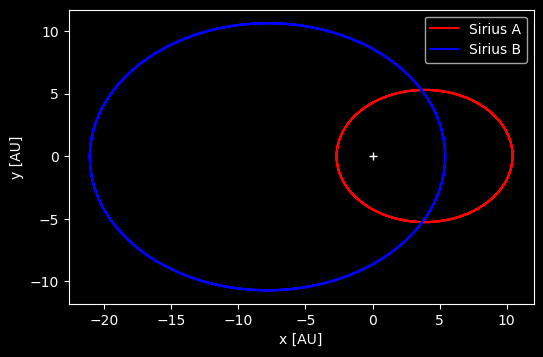

In [13]:
plt.style.use('dark_background') #O estilo é opcional
fig = plt.figure(figsize=(6, 6*35/55), dpi=100) 
plt.plot([0],[0],'+w')
plt.plot(x_1/au,y_1/au,color='r', label = 'Sirius A')
plt.plot(x_2/au,y_2/au,color='blue', label = 'Sirius B')
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.legend()
plt.show()

## Conclusão

$\quad$ No presente `Notebook` analisamos o comportamento do movimento dos planetas e de estrelas binárias, observando que tais corpos celestes têm movimentos que mais se assemelham a uma elipse, e não com um círculo. Isto é, em primeiro momento introduzimos o conceito de centro de massa e, por meio deste conceito, podemos considerar que a massa de um sistema pode estar localizada em um único ponto. Deste modo, tornou-se mais fácil e viável determinar a dinâmica de movimentação dos corpos celestes.

$\quad$ Em segundo momento, com o conceito de centro de massa já entendido, conseguimos deduzir as três leis de Kepler essenciais para o estudo da dinâmica orbital entre dois corpos celestes. Derivamos da primeira lei de Kepler, nela chegamos à conclusão de que os planetas orbitam em uma forma elíptica, tendo uma estrela (no nosso caso, o Sol) em um dos focos da elipse, e encontramos uma fórmula para tal lei. Para a segunda lei de Kepler, vimos que um planeta varre uma área igual em intervalo de tempos iguais. Por fim, a terceira lei de Kepler, encontramos uma relação entre o período orbital e o maior semi-eixo da elipse. Para todas as leis, determinamos fórmulas matemáticas.

$\quad$ Após a parte teórica, implementamos códigos que realizassem o cálculo do período que um planeta leva para completar uma revolução em torno do Sol e aplicamos um código capaz de mostrar gráficos a fim de facilitar o entendimento. Por fim, aplicamos um código que mostra o movimento entre duas estrelas e observamos sua órbita. Deste modo, neste `Notebook` entendemos sobre a mecânica orbital responsável pelo movimento de planetas e estrelas binárias.

## Referências

**[1]** SCHMIDT, W.; VÖLSCHOW, M. Numerical Python in Astronomy and Astrophysics. [s.l.] Springer Nature, 2021.

**[2]** CARROLL, B. W.; OSTLIE, D. A. An introduction to modern astrophysics. 2. ed. Cambridge Etc.: Cambridge University Press, 2017.

**[3]** M E J NEWMAN. Computational physics. North Charleston, Sc: Createspace, 2013.
